In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import string

In [2]:
data=pd.read_csv('/content/Myntra kurtis.csv')

In [3]:
print(data.head())

       Brand Name                                        Product URL  \
0  Rain & Rainbow  https://www.myntra.com/kurtis/rain--rainbow/ra...   
1        HERE&NOW  https://www.myntra.com/kurtis/herenow/herenow-...   
2           Anouk  https://www.myntra.com/kurtis/anouk/anouk-wome...   
3       Anubhutee  https://www.myntra.com/kurtis/anubhutee/anubhu...   
4           GERUA  https://www.myntra.com/kurtis/gerua/gerua-wome...   

                                               Image  Product Ratings  \
0  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.2   
1  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.2   
2  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.2   
3  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.3   
4  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.2   

   Number of ratings                               Product Info  \
0                 28                  Printed Pure Cotton Kur

The data contains information about:

brand name of the product
URL of the product
Image URL of the product
Ratings of the product on Myntra
Total number of ratings
Information about the product
Selling price and original price of the product
and discount on the product
Let’s have a look if the dataset contains any null values or not

In [4]:
data.isnull().sum()

Brand Name             0
Product URL            0
Image                467
Product Ratings      198
Number of ratings      0
Product Info           0
Selling Price         74
Price                 74
Discount              74
dtype: int64

The dataset has some null values, but there are 467 null values in the Image column, where the total number of rows in the data is 600. So, I will delete the Image column and move further:

In [5]:

data=data.drop('Image',axis=1)

In [7]:
data=data.dropna()
#Now let’s have a look at the shape of the dataset:
data.shape

(364, 8)

So there are 364 rows present in the dataset after removing the null values. Now let’s move forward by looking at the brands that sell Kurtis more on Myntra:

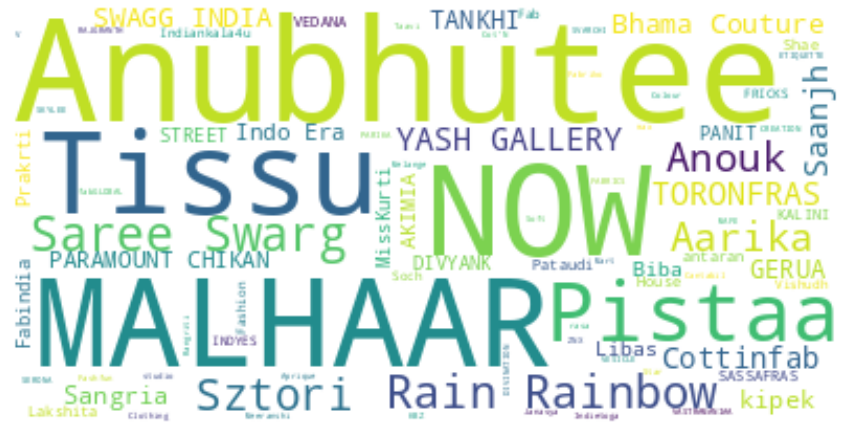

In [15]:
text=" ".join(i for i in data['Brand Name'])
stopwords=set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure(figsize=(15,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


So, brands like Anubhutee, Malhaar, Now, Tissu, and Pistaa are popular for Kurtis on Myntra. Now let’s have a look at the highest-rated Kurtis on Myntra:

**Recommending Fashion Products**

To recommend the trending fashion, we cannot use the content-based filtering strategy. The content-based filtering strategy is good to use when a user is looking at a fashion product, and your application wants to recommend something similar.

To recommend the trending fashion, we can find the weighted average of all the ratings and recommend the products based on the weighted average ratings. To count the weighted score of all the ratings of Kurtis, we need:

mean rating (mr): the mean rating of all the products
minimum ratings (m): minimum number of ratings
number of ratings (n): total number of ratings of the product
average ratings (a): average rating of the product
Now below is the formula to calculate the weighted score of the product ratings:


score = (n/(n+m) * a) + (m/(m+n) * mr)
Now let’s calculate the weighted score and recommend the most trending Kurtis on Myntra:

In [22]:
mr=data['Product Ratings'].mean()
m=data['Number of ratings'].quantile(0.9)
n=data['Number of ratings']
a=data['Product Ratings']
data['score']=(n/(n+m)*a)+(m/(m+n)*mr)

In [31]:
recommendation=data.sort_values('score',ascending=False)
print(recommendation[['Brand Name', 'Product Info',
                       'Product Ratings', 'score','Discount','Selling Price']].head(10) )

         Brand Name                                       Product Info  \
48            Tissu                    Women Floral Print A-Line Kurti   
11        Anubhutee                        Ethnic Motifs Printed Kurti   
155       Anubhutee                                Women Printed Kurti   
66     YASH GALLERY                               Printed A-Line Kurti   
27        Anubhutee                       Women Printed Straight Kurti   
102          AKIMIA                      Embroidered Pure Cotton Kurti   
88            Tissu                Women Floral Printed Straight Kurti   
3         Anubhutee                        Ethnic Motifs Printed Kurti   
42   Rain & Rainbow  Women Printed Pure Cotton Pure Cotton A-Line K...   
18            GERUA                        Ethnic Motifs Printed Kurti   

     Product Ratings     score   Discount  Selling Price  
48               4.4  4.338320  (45% OFF)          549.0  
11               4.4  4.300868  (70% OFF)          521.0  
155     